# Прогноз оттока и кластеризация клиентов фитнес-центра

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#Анализ-основных-статистических-показателей" data-toc-modified-id="Анализ-основных-статистических-показателей-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ основных статистических показателей</a></span></li><li><span><a href="#Анализ-средних-значений-признаков-по-группам-клиентов" data-toc-modified-id="Анализ-средних-значений-признаков-по-группам-клиентов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ средних значений признаков по группам клиентов</a></span></li><li><span><a href="#Визуализация-распределения-признаков-по-группам-клиентов" data-toc-modified-id="Визуализация-распределения-признаков-по-группам-клиентов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Визуализация распределения признаков по группам клиентов</a></span></li><li><span><a href="#Матрица-корреляций" data-toc-modified-id="Матрица-корреляций-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Матрица корреляций</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Сравнение-моделей" data-toc-modified-id="Сравнение-моделей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сравнение моделей</a></span></li><li><span><a href="#Выбор-финальной-модели,-интерпретация-результатов" data-toc-modified-id="Выбор-финальной-модели,-интерпретация-результатов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Выбор финальной модели, интерпретация результатов</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Обучение-и-запуск-модели-K-means" data-toc-modified-id="Обучение-и-запуск-модели-K-means-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Обучение и запуск модели K-means</a></span></li><li><span><a href="#Интерпретация-результатов" data-toc-modified-id="Интерпретация-результатов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Интерпретация результатов</a></span></li><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

Загрузим все необходимые для работы библиотеки и методы:

In [1]:
# импорт библиотек и методов
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

<a id='intro1'></a>
## Обзор данных

Загрузим датасет и посмотрим на фрагмент данных из него:

In [2]:
# загрузка датасета (полный путь не приводится, т.к. датасет не размещен в открытом доступе)
df = pd.read_csv(path)

# приведение наименований колонок к "змеиному" регистру
df.columns = df.columns.str.lower()

# вывод фрагмента таблицы
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Набор данных включает следующие поля:
* Данные клиента за предыдущий до проверки факта оттока месяц:
    * `gender` — пол;
    * `near_location` — проживание или работа в районе, где находится фитнес-центр;
    * `partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
    * `promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
    * `phone` — наличие контактного телефона;
    * `age` — возраст;
    * `lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).
* Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    * `contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
    * `month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
    * `group_visits` — факт посещения групповых занятий;
    * `avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
    * `avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
    * `avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* `churn` — факт оттока в текущем месяце.

Посмотрим на размер таблицы:

In [3]:
df.shape

(4000, 14)

Таблица состоит из 4000 строк и 14 столбцов. Предоставленных данных достаточно для выполнения задач исследования.

<a id='intro2'></a>
## Исследовательский анализ данных (EDA)

Выведем общую информацию о таблице:

In [4]:
# вывод общей информации о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

Все данные представлены в числовых форматах: целые или вещественные числа. Для выполнения задач исследования изменение типов данных не требуется.

Таблица не содержит пропущенных значений.

Посмотрим, нет ли в таблице неявных дубликатов в категориальных переменных:

In [5]:
# список категориальных признаков (включая целевую переменную)
cat_features = ['gender', 'near_location', 'partner', 'promo_friends',
                'phone', 'contract_period', 'group_visits', 'churn']

for element in cat_features:
    print(element, ': ', df[element].unique())

gender :  [1 0]
near_location :  [1 0]
partner :  [1 0]
promo_friends :  [1 0]
phone :  [0 1]
contract_period :  [ 6 12  1]
group_visits :  [1 0]
churn :  [0 1]


Неявных дубликатов не обнаружено. Посмотрим, есть ли полные дубликаты:

In [6]:
df.duplicated().sum()

0

Полных дубликатов также не обнаружено, данные готовы к исследовательскому анализу.

<a id='intro2A'></a>
### Анализ основных статистических показателей

Изучим средние значения и стандартные отклонения показателей:

In [7]:
# вывод отдельных статистических показателей
df.describe().loc[['mean', 'std']].T.style.format('{:.2f}')

,mean,std
gender,0.51,0.50
near_location,0.85,0.36
partner,0.49,0.50
promo_friends,0.31,0.46
phone,0.90,0.30
contract_period,4.68,4.55
group_visits,0.41,0.49
age,29.18,3.26
avg_additional_charges_total,146.94,96.36
month_to_end_contract,4.32,4.19


Общее наблюдение: у переменных довольно разные по величине стандартные отклонения. Это говорит о том, что их возможно нужно стандартизировать перед обучением. Хотя стандартизация не для всех моделей является обязательной, иногда проще стандартизировать всё, а потом уже подбирать модели.

Основные выводы по признакам (портрет среднестатистического клиента):
* `gender` — распределение клиентов по полу в датасете примерно одинаковое;
* `near_location` — около 85% клиентов выбрали фитнес-клуб по параметру близости к району проживания или работы;
* `partner` — примерно половина клиентов являются сотрудниками компаний-партнёров клуба;
* `promo_friends` — около 30% клиентов пришли в клуб по акции «приведи друга» (использовали промо-код от знакомого при оплате первого абонемента);
* `phone` — примерно 90% клиентов оставили в клубе контактный телефон;
* `contract_period` — средняя длительность текущего действующего абонемента составляет около 5 месяцев;
* `group_visits` — около 40% клиентов посещают групповые занятия;
* `age` — средний возраст клиентов 29 лет, стандартное отклонение от среднего значения небольшое: +/- 3 года;
* `avg_additional_charges_total` — средняя суммарная выручка от дополнительных услуг фитнес-центра составляет 147 у.е. на 1 клиента, разброс значений от среднего значительный
* `month_to_end_contract` — срок до окончания текущего абонемента составляет в среднем по клиентам около 4 месяцев, разброс значений большой;
* `lifetime` — среднее время с момента первого обращения в фитнес-центр составляет 3.7 месяцев, разброс значений большой.
* `avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента составляет 1.9 раз, разброс значений значителей;
* `avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц составляет 1.8 раз (близка к текущему показателю), разброс значений значителен;
* `churn` — около 27% клиентов в текущем месяце отказались от посещения клуба.

<a id='intro2B'></a>
### Анализ средних значений признаков по группам клиентов

Теперь изучим средние значения признаков в разбивке по двум группам клиентов: тем, кто ушел в отток, и тем, кто остался:

In [8]:
# группировка таблицы с расчетом средних значений по столбцам
df_grouped = df.groupby('churn').mean().T
df_grouped['diff'] = df_grouped[1] - df_grouped[0]
df_grouped.style.format('{:.2f}')

churn,0,1,diff
gender,0.51,0.51,0.00
near_location,0.87,0.77,-0.10
partner,0.53,0.36,-0.18
promo_friends,0.35,0.18,-0.17
phone,0.90,0.90,-0.00
contract_period,5.75,1.73,-4.02
group_visits,0.46,0.27,-0.20
age,29.98,26.99,-2.99
avg_additional_charges_total,158.45,115.08,-43.36
month_to_end_contract,5.28,1.66,-3.62


Основные выводы по признакам приведем по ушедшим клиентам в сравнении с оставшимися (описываем только различия):
* `near_location` — среди ушедших клиентов доля живущих/работающих рядом с клубом на 10 п.п. меньше;
* `partner` — среди ушедших клиентов доля сотрудников компаний-партнёров клуба на 18 п.п. меньше;
* `promo_friends` — среди ушедших клиентов на 17 п.п. меньше людей, пришежших в клуб в рамках акции «приведи друга»;
* `contract_period` — ушедшие клиенты в среднем заключали контракты с клубом на более короткий срок: средняя длительность текущего абонемента у них составила 1.73 месяца против 5.75 месяцев у оставшихся клиентов;
* `group_visits` — среди ушедших клиентов доля посещавших групповые занятия на 20 п.п. меньше;
* `age` — ушедшие клиенты, в среднем, на 3 года моложе оставшихся;
* `avg_additional_charges_total` — средняя суммарная выручка от дополнительных услуг фитнес-центра по ушедшим клиентам на 43 у.е. ниже, чем по оставшимся;
* `month_to_end_contract` — клиенты уходили с оставшимся средним сроком до окончания текущего абонемента около 1.7 месяцев;
* `lifetime` — среднее время с момента первого обращения в фитнес-центр по ушедшим клиентам составляет всего 1 месяц против 5 месяцев по оставшимся. Это говорит о том, что, в среднем, уходят недавно привлеченные клиенты;
* `avg_class_frequency_total` — ушедшие клиенты, в среднем, на 25 п.п. реже посещали занятия за все время с начала действия абонемента;
* `avg_class_frequency_current_month` — ушедшие клиенты, в среднем, вполовину реже посещали занятия в течение последнего месяца перед уходом;

<a id='intro2C'></a>
### Визуализация распределения признаков по группам клиентов

Визуализируем распределения признаков по группам клиентов (оставшиеся и ушедшие). Для наглядности выберем разные типы графиков для категориальных и числовых переменных:

In [9]:
# список числовых признаков
num_features = ['lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month',
                'month_to_end_contract', 'age', 'avg_additional_charges_total']

# список категориальных признаков
cat_features = ['gender', 'near_location', 'partner', 'promo_friends',
                'phone', 'group_visits', 'contract_period']

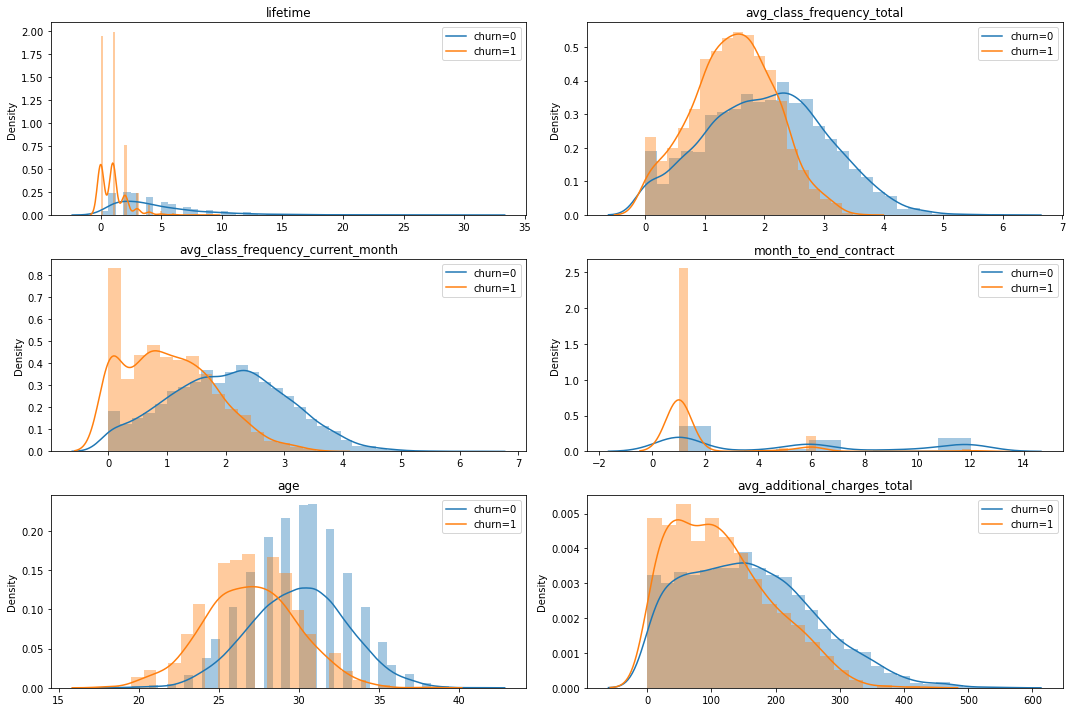

In [10]:
# построение графиков для числовых признаков
fig = plt.figure(figsize=(15, 10))

for i in range(len(num_features)):
    axi = fig.add_subplot(3,2,i+1)
    sns.distplot(df.loc[df['churn'] == 0][num_features[i]],ax=axi)
    sns.distplot(df.loc[df['churn'] == 1][num_features[i]], ax=axi)
    axi.legend(['churn=0', 'churn=1'])
    axi.set_title(num_features[i])
    axi.set_xlabel('')

fig.tight_layout()
plt.show()

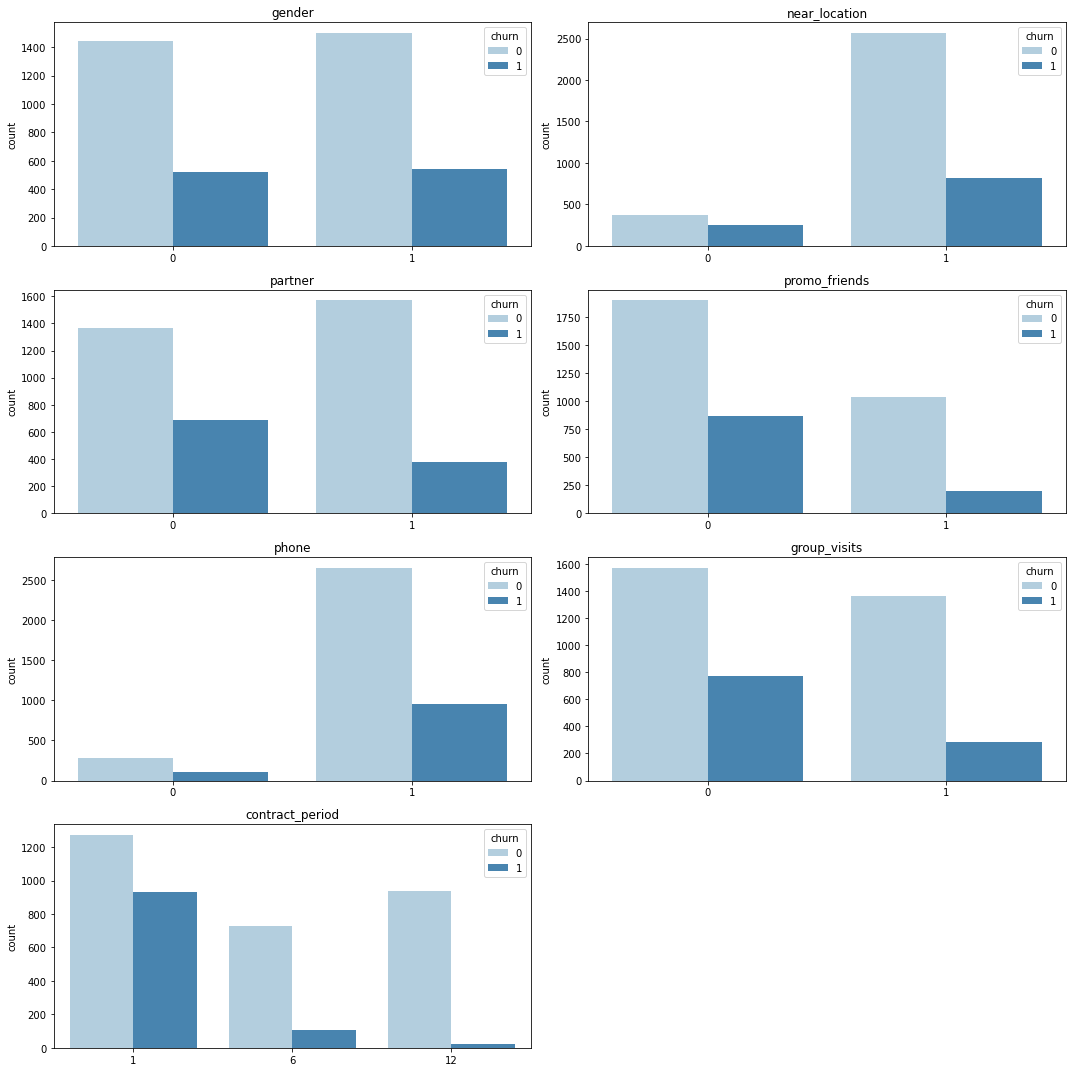

In [11]:
# построение графиков для категориальных признаков
fig = plt.figure(figsize=(15, 15))

for i in range(len(cat_features)):
    axi = fig.add_subplot(4,2,i+1)
    sns.countplot(x=cat_features[i], hue='churn', data=df, palette='Blues', ax=axi)
    axi.set_title(cat_features[i])
    axi.set_xlabel('')

fig.tight_layout()
plt.show()

Графики дополняют выводы, сформулированные выше по ушедшим клиентам в сравнении с оставшимися. Кроме того, по графикам видно, что в числовых переменных нет явных выбросов, а их распределения далеки от нормального распределения: в ходе разработки моделей потребуется стандартизация и нормализация.

<a id='intro2D'></a>
### Матрица корреляций

Построим корреляционную матрицу признаков набора данных и визуализируем ее с помощью тепловой карты:

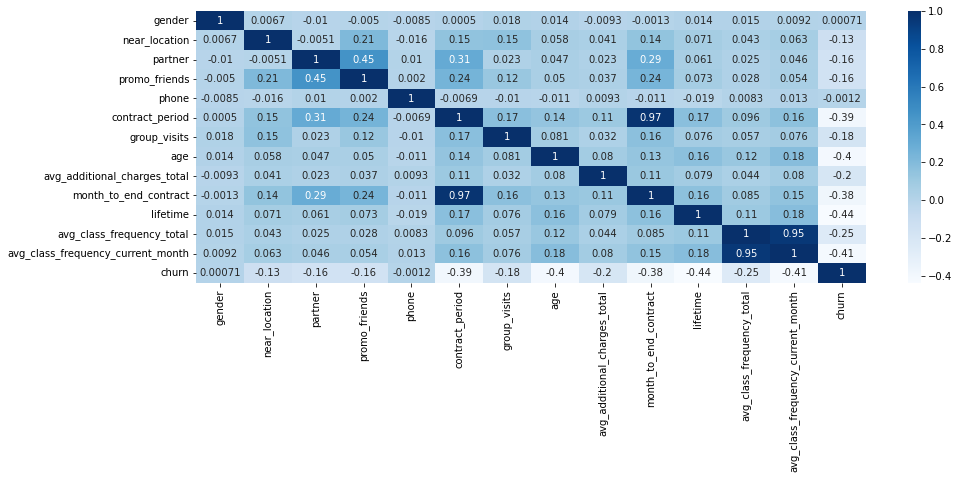

In [12]:
# тепловая карту с подписями для матрицы корреляций
fig = plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

По матрице корреляций можно сделать следующие выводы:
* в таблице нет признаков, которые значительно коррелируют с целевой переменной оттока;
* есть две пары признаков, которые сильно коррелируют между собой: `contract_period` - `month_to_end_contract` и `avg_class_frequency_total` - `avg_class_current_month`, что логично по смыслу этих показателей (один вытекает из другого). Для линейных моделей взаимная корреляция признаков нежелательна, поэтому необходимо будет учесть обнаруженный факт при их построении.

<a id='intro2E'></a>
### Промежуточный вывод

В ходе исследовательского анализа данных сформулированы следующие выводы:
* формат данные в исходной таблице подходит для осуществления дальнейщих задач по построению моделей (всем категориальным признакам присвоены числовые значения), пропуски данных и дубликаты отсутствуют;
* явных выбросов в числовых данных нет, их распределения далеки от нормального распределения: в ходе разработки моделей потребуется стандартизация и нормализация;
* почти все признаки, описывающие ушедших клиентов, в среднем, хуже аналогичных признаков у оставшихся клиентов;
* в таблице нет признаков, которые сильно коррелируют с целевой переменной оттока клиентов, т.е. правильный ответ на вопрос "клиент уйдет или останется" только на основании анализа признаков без построения модели сформулировать проблематично;
* определены скоррелированные признаки `contract_period` - `month_to_end_contract` и `avg_class_frequency_total` - `avg_class_current_month`, факт наличия которых нужно иметь в виду при выборе моделей.

<a id='intro3'></a>
## Модель прогнозирования оттока клиентов

<a id='intro3A'></a>
### Сравнение моделей

Построим модель бинарной классификации клиентов, где целевым признаком будет факт оттока клиента в следующем месяце.

Для начала посмотрим на имеющиеся данные в столбце `churn` (целевая переменная) и сделаем вывод о балансе классов:

In [13]:
# посмотрим, как соотносятся классы набора данных
print('Соотношение классов в %:')
print(round(df['churn'].value_counts()/4000*100))
print()

Соотношение классов в %:
0    73.0
1    27.0
Name: churn, dtype: float64



Видим, что с точки зрения классов "0 - клиент остался" и "1 - клиент ушел" наши данные несбалансированы: в отток уходят 27% клиентов из всей выборки. Этот факт можно будет учесть при разбиении выборок на обучающую и валидационную и при отладке метрик финальной модели.

На основании исходных данных выделим признаки (матрица X) и целевую переменную (y), при этом удалим по одному из признаков из каждой пары, показавшей высокую корреляцию на предыдущем шаге. После этого разделим модель на обучающую и валидационную выборки в пропорциях 80 на 20 и проведем стандартизацию признаков. Стандартизация необходима как для построения линейных моделей, так и моделей, чувствительных к расстояниям между объектами, например, кластеризации (будем строить на следующем шаге).

In [14]:
# разделим данные на признаки (матрица X) и целевую переменную (y)
X = df.drop(columns=['churn', 'contract_period', 'avg_class_frequency_total'])
y = df['churn']

# разделим модель на обучающую и валидационную выборку с учетом пропорции классов в исходной выборке
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

# создадим "стандартизатор" - объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
# обучим "стандартизатор" на обучающей выборке и одновременно трансформируем матрицу для обучающей выборки
X_train_st = scaler.fit_transform(X_train) 
# применим стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

Создадим функцию, с помощью которой сможем обучать модели и сравнивать их качество, функция последовательно будет выполнять следующие действия:
* обучать модель на обучающей выборке;
* делать прогноз на валидационных данных;
* выводить метрики Accuracy, Precision, Recall для прогнозов, которые выдаст модель на валидационной выборке.

In [15]:
# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(model, X_train, y_train, X_test, y_test, model_label):
    # задаем тип модели
    model = model
    # обучаем модель на train-выборке
    model.fit(X_train, y_train)
    # делаем прогнозы для test-выборки
    y_pred = model.predict(X_test)
    # выводим название модели и метрики
    print(model_label)
    print(
        '  Accuracy: {:.2f} Precision: {:.2f} Recall: {:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred)
        )
    ) 

Для прогнозирования оттока клиентов выберем две модели - Логистическую регрессию и Случайный лес. С помощью созданной функции обучим модели и оценим их метрики на валидационной выборке:

In [16]:
make_prediction(
    model=LogisticRegression(solver='liblinear', random_state=0),
    X_train=X_train_st,
    y_train=y_train,
    X_test=X_test_st,
    y_test=y_test,
    model_label='\nЛогистическая регрессия:'    
)

make_prediction(
    model=RandomForestClassifier(n_estimators = 100, random_state=0),
    X_train=X_train_st,
    y_train=y_train,
    X_test=X_test_st,
    y_test=y_test,
    model_label='\nСлучайный лес:'    
)


Логистическая регрессия:
  Accuracy: 0.92 Precision: 0.84 Recall: 0.84

Случайный лес:
  Accuracy: 0.91 Precision: 0.85 Recall: 0.80


Видим, что метрики обеих моделей очень близки друг к другу:
- обе модели дают чуть больше 90% правильных ответов - отличный показатель;
- обе модели делают прогнозы с достойной точностью, при этом модель Случайного леса обладает чуть более высокой точностью и дает 85% правильных ответов среди целевого класса;
- по метрике полноты Логистическая регрессия показывает себя лучше Случайного леса и обнаруживает 84% реальных объектов целевого класса.

<a id='intro3B'></a>
### Выбор финальной модели, интерпретация результатов

В нашей задаче метрику Recall (полнота) логично считать целевой метрикой, поскольку чем больше реальных объектов из класса "1 - клиент ушел" модель может обнаружить, тем большую ценность для бизнеса она будет представлять. При этом чем ниже точность модели (метрика Precision), тем больше ложно позитивных ответов формирует модель внутри целевого "1 - клиент ушел". При прогнозировании на следующий месяц модель с низкой точностью по части клиентов предскажет, что они уйдут, а по факту они останутся, т.е. модель будет чаще срабатывать ложно. При этом гораздо лучше будет принять превентивные меры по предотвращению ухода таких клиентов (например, опрос с целью выяснить намерения) и понять, что тревога была ложная (низкая метрика точности), чем "прозевать" настоящий отток (низкая метрика полноты). 

Выберем в качестве финальной модели Логистическую регрессию и попробуем увеличить метрику Recall (полнота) через обучение модели с учетом баланса классов (гиперпараметр class_weight='balanced'):

In [17]:
make_prediction(
    model=LogisticRegression(solver='liblinear', random_state=0),
    X_train=X_train_st,
    y_train=y_train,
    X_test=X_test_st,
    y_test=y_test,
    model_label='\nЛогистическая регрессия: метрики без учета баланса классов'    
)

make_prediction(
    model=LogisticRegression(solver='liblinear', random_state=0, class_weight='balanced'),
    X_train=X_train_st,
    y_train=y_train,
    X_test=X_test_st,
    y_test=y_test,
    model_label='\nЛогистическая регрессия: метрики c учетом баланса классов'    
)


Логистическая регрессия: метрики без учета баланса классов
  Accuracy: 0.92 Precision: 0.84 Recall: 0.84

Логистическая регрессия: метрики c учетом баланса классов
  Accuracy: 0.90 Precision: 0.74 Recall: 0.94


Видим, целевая метрика Recall улучшилась на 10 п.п.: теперь модель обнаруживает 94% реальных клиентов, которые по факту ушли в отток. Метрика Accuracy упала совсем незначительно, а вот метрика Precision снизилась на 10 п.п., что логично, поскольку точность и полнота модели работают на минимизацию противоположных рисков.

Попробуем проинтерпретировать финальную модель через анализ важности признаков (в случае с линейными моделями ее показывают модули коэффициентов регрессии):

In [18]:
# обучим финальную модель
final_model = LogisticRegression(solver='liblinear', random_state=0, class_weight='balanced')
final_model.fit(X_train_st, y_train)
# сделаем прогноз
y_pred = final_model.predict(X_test_st)

# создадим датафрейм с именами признаков, их весами и важностью (модули весов)
pd.DataFrame({'feature': X_test.columns,
              'weight': final_model.coef_[0],
              'importance': abs(final_model.coef_[0])}
            ).sort_values(by='importance', ascending=False)

,feature,weight,importance
9,lifetime,-3.522635,3.522635
8,month_to_end_contract,-1.358286,1.358286
10,avg_class_frequency_current_month,-1.329797,1.329797
6,age,-1.160571,1.160571
7,avg_additional_charges_total,-0.563813,0.563813
5,group_visits,-0.378206,0.378206
3,promo_friends,-0.150352,0.150352
1,near_location,-0.077028,0.077028
2,partner,-0.076135,0.076135
4,phone,-0.075469,0.075469


Итак, при прогнозировании оттока клиентов финальная модель придает наибольшую важность следующим признакам (топ-5):
* время с момента первого обращения в фитнес-центр: постоянные клиенты реже уходят;
* срок до окончания текущего абонемента: снижение этого срока увеличивает вероятность ухода;
* средняя частота посещений в неделю за предыдущий месяц: чем чаще клиент тренируется, тем менее вероятен его уход;
* возраст клиента: чем моложе клиенты, тем чаще они уходят (на поиски лучшего варианта);
* выручка от прочих услуг фитнес-центра: чем больше клиент готов тратить (более лоялен), тем меньше вероятность его ухода.

<a id='intro3C'></a>
### Промежуточный вывод

Для прогноза оттока клиентов выбрана модель Логистической регрессии с учетом баланса классов: на валидационных данных она верно обнаруживает 94% клиентов, которые по факту ушли в отток.  Анализ важности признаков в совокупности с результатами кластеризации клиентов позволит сформулировать рекомендации для стратегии взаимодействия с клиентами и их удержания.

<a id='intro4'></a>
## Кластеризация клиентов

<a id='intro4A'></a>
### Обучение и запуск модели K-means

Для решения задачи кластеризации клиентов фитнес-центра необходимо предположить, какое количество кластеров можно выделить. Делать это будем с помощью построения матрицы расстояний для признаков (предварительно стандартизированных) и отрисовки дендрограммы:

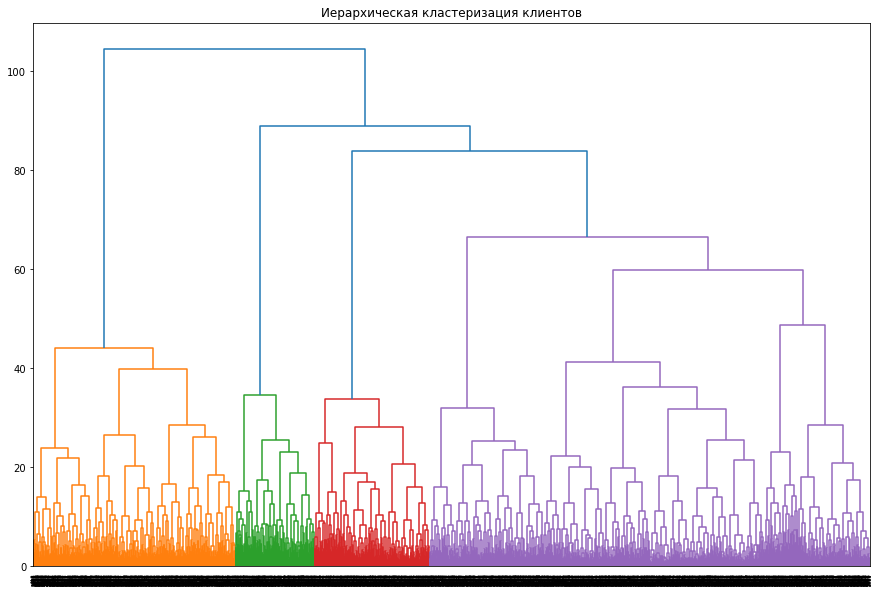

In [19]:
# построим матрицу признаков
X = df.drop(columns=['churn'])

# создадим "стандартизатор" - объект класса StandardScaler
scaler = StandardScaler()
# обучим "стандартизатор" и преобразуем набор данных
X_st = scaler.fit_transform(X)

# создадим таблицу "связок" между объектами
linked = linkage(X_st, method = 'ward')

# визуализируем таблицу связок с помощью дендрограммы
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация клиентов')
plt.show() 

Предложенное оптимальное число кластеров 4 — четыре разных цвета на графике. Мы же будем следовать поставленному ТЗ и сегментацию клиентов проведем с помощью модели кластеризации на основании алгоритма K-means с числом кластеров n=5:

In [20]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters=5, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присвоит им номера от 0 до 4)
labels = km.fit_predict(X_st)

# сохраняем метки кластера в поле нашего датасета
df['cluster'] = labels

# выведем статистику по средним значениям признаков по каждому кластеру
df.drop(columns=['churn']).groupby('cluster').mean().T.style.format('{:.2f}')

cluster,0,1,2,3,4
gender,0.50,0.52,0.50,0.49,0.56
near_location,0.96,0.86,0.00,1.00,0.98
partner,0.78,0.47,0.46,0.35,0.36
promo_friends,0.57,0.31,0.08,0.24,0.23
phone,1.00,0.00,1.00,1.00,1.00
contract_period,10.89,4.79,2.35,1.95,2.67
group_visits,0.54,0.43,0.22,0.34,0.47
age,29.98,29.30,28.48,28.17,30.13
avg_additional_charges_total,160.76,143.96,135.46,131.62,161.66
month_to_end_contract,9.95,4.48,2.20,1.86,2.46


Анализ таблицы позволяет сделать вывод, что при делении клиентов на кластеры модель кластеризации также ориентируется на те признаки, которые обладали наибольшей важностью для модели оттока клиентов, построенной на предыдущем шаге.

<a id='intro4B'></a>
### Интерпретация результатов

Интерпретировать логику разбивки клиентов на кластеры будет проще по совокупному анализу средних показателей из этой таблицы и визуализированным распределениям признаков для каждого кластера. Для наглядности выберем разные типы графиков для категориальных и числовых переменных:

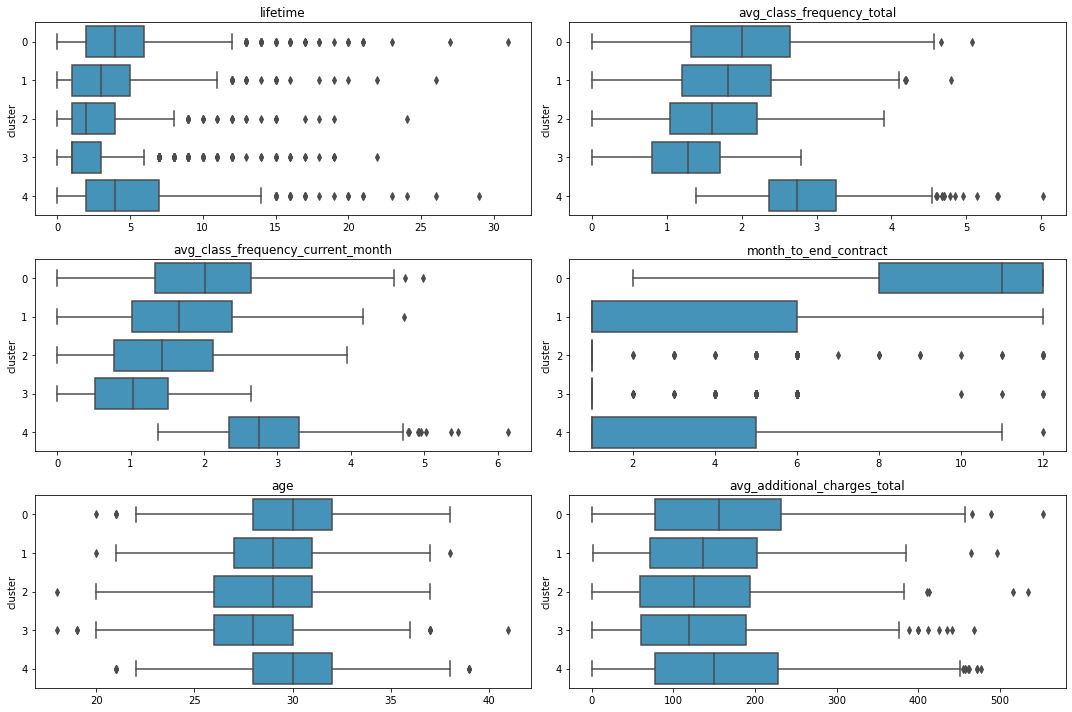

In [21]:
# построение графиков для числовых признаков
fig = plt.figure(figsize=(15, 10))

for i in range(len(num_features)):
    axi = fig.add_subplot(3,2,i+1)
    sns.boxplot(x = num_features[i], y = 'cluster', data = df, orient='h', color='#3399CC', ax=axi)
    axi.set_title(num_features[i])
    axi.set_xlabel('')

fig.tight_layout()
plt.show()

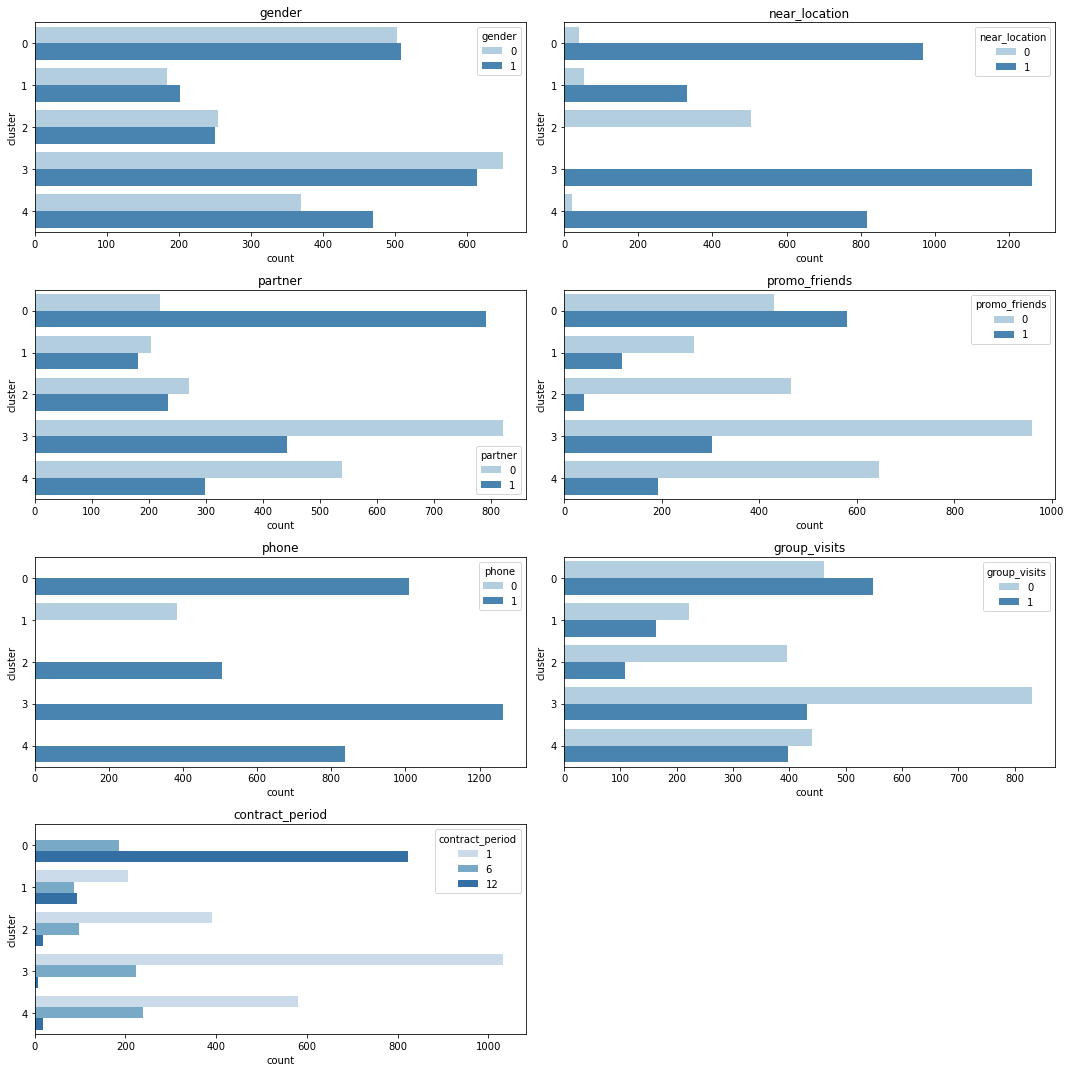

In [22]:
#построение графиков для категориальных признаков
fig = plt.figure(figsize=(15, 15))

for i in range(len(cat_features)):
    axi = fig.add_subplot(4,2,i+1)
    sns.countplot(y='cluster', hue=cat_features[i], data=df, orient='h', palette='Blues', ax=axi)
    axi.set_title(cat_features[i])

fig.tight_layout()
plt.show()

Попробуем интерпретировать логику сегментации клиентов, которую предложила модель, в первую очередь ориентируясь на анализ средних значений признаков, входящих в топ-5 по важности в модели оттока:

* `кластеры 0 и 4` объединяют в себе постоянных лояльных клиентов, обладающих признаками:
    * дольше других ходят в фитнес-клуб (специфика бизнеса такова, что термин "постоянный клиент" можно применить уже при среднем лайфтайме в 5 месяцев);
    * общая частота посещений клуба совпадает с частотой за последний месяц, т.е. ходят стабильно;
    * больше других тратят на доп.услуги клуба;
    * медианный возраст в обоих кластерах - 30 лет - наибольший среди остальных;
    * выбрали клуб по близости к дому/работе;
    * различие в кластерах наблюдается по следующим признакам:
        * в типе абонемента: клиенты кластера 0 заключают самые долгосрочные контракты с клубом (перевес в пользу годовых абонементов), а клиенты кластера 4 предпочитают ежемесячные и полугодовые контракты;
        * клиенты кластера 4 показывают наибольшую частоту посещения клуба как в целом, так и за последний месяц;
        * бОльшая часть клиентов кластера 0 являются работниками компаний-партнеров или пришли по акции "приведи друга"
    
* `кластер 1` объединил в себе клиентов, которые в сравнении с кластерами 0 и 4:
    * позднее стали ходить в клуб;
    * посещают занятия реже и менее стабильно;
    * приобретают разные типы абонементов с преобладанием ежемесячных;
    * чуть меньше пользуются доп.услугами клуба;
    * этот кластер объединил всех клиентов, предпочитающих не оставлять свои контакты

* `кластеры 2 и 3` объединяют в себе клиентов, обладающих признаками:
    * клиенты начали ходить в клуб недавно, при этом в кластере 3 самые "свежие" клиенты;
    * предпочитают покупать ежемесячные абонементы;
    * примерно одинаково тратят на доп.услуги клуба;
    * различие в кластерах наблюдается в частоте посещений (кластер 3 обладает самой низкой частотой), в близости клуба (для всех клиентов кластера 2 клуб далеко от дома/работы, а в кластере 3 наоборот) и в возрасте клиентов (в кластере 3 самые молодые клиенты по медианному возрасту)

Для каждого кластера проанализируем долю оттока:

In [23]:
# выведем долю оттока по каждому кластеру
df.groupby('cluster') \
  .agg({'churn': 'mean'}) \
  .reset_index() \
  .sort_values(by='churn', ascending=False) \
  .rename(columns={'churn': 'churn_ratio'}) \
  .style.format({'churn_ratio': '{:.1%}'})

,cluster,churn_ratio
3,3,51.4%
2,2,44.4%
1,1,26.8%
4,4,6.8%
0,0,2.8%


<a id='intro4C'></a>
### Промежуточные выводы

В результате проведенной кластеризации клиентов сформированы 5 сегментов клиентов, которые помимо различий в основных признаках демонстрируют разную склонность к оттоку:
* наиболее склонны к оттоку клиенты-новички из кластера 3: это самые молодые клиенты, около 1-2 месяцев назад пришедшие в клуб рядом с домом/работой, купившие ежемесячный абонемент и не отличающиеся высокой частотой тренировок. Частота тренировок за последний месяц у этих клиентов снизилась на 20% по сравнению с общей частотой с начала действия абонемента, и почти половины таких клиентов по факту ушла в отток;
* около 44% клиентов, ушедших в отток, входят в кластер 2: это клиенты, около 2-3 месяцев назад пришедшие в клуб, располагающийся далеко от дома/работы, и купившие ежемесячный абонемент. Частота тренировок за последний месяц у этих клиентов снизилась на 10% по сравнению с общей частотой с начала действия абонемента, и почти половины таких клиентов по факту ушла в отток;
* на третьем месте по склонности к оттоку располается кластер 1: это клиенты, которые пришли около 3-4 месяцев назад в клуб, располагающийся далеко от дома/работы, и купившие ежемесячный абонемент. Частота тренировок за последний месяц у этих клиентов снизилась на 8% по сравнению с общей частотой с начала действия абонемента, при этом общая частота тренировок у них была хорошая. Из этого кластера по факту ушли в отток около 27% клиентов;
* наиболее стабильны в плане оттока клиенты из кластеров 4 и 0, уходят около 7% и около 3% клиентов соответственно. Это самые лояльные к клубу клиенты, которые дольше всех и чаще всех ходят на тренировки, активнее всех пользуются доп.услугами центра. Самый стабильный сегмент - кластер 0 - это клиенты-работники компаний партнеров или пришедшие по акции "приведи" друга, и купившие годовой абонемент (вероятно, со скидкой).

<a id='intro5'></a>
## Выводы и рекомендации

В ходе исследования выполнены следующие задачи и сформулированы выводы:
* Изучены предоставленные данные по 4 тысячам клиентов фитнес-центра, 27% из них по факту ушли в отток.
* Построена модель прогнозирования оттока клиентов, основанная на модели логистической регрессии с учетом фактического баланса классов. На валидационных данных модель обнаружила 93% клиентов, которые по факту ушли в отток, при этом такая полнота обеспечена за счет относительно невысокой точности: на 30% клиентов из валидационной выборки модель показала ложное срабатывание, т.е. предсказала отток, тогда как по факту клиент не ушел. При этом для бизнеса гораздо лучше будет принять превентивные меры по предотвращению ухода таких клиентов и понять, что тревога была ложная, чем "прозевать" настоящий отток. 
* С помощью модели K-means проведена кластеризация клиентов: получены 5 кластеров, различающихся как по средним значениям признаков, так и по склонности к оттоку.

По результатам исследования можно сформулировать следующие рекомендации для стратегии взаимодействия с клиентами и из удержания:
* Создать систему предиктивной аналитики, которая должна обязательно включать анализ основных признаков, которые являются наиболее важными в модели прогнозирования оттока (т.е. оказывают наибольшее влияние на целевую переменную оттока):
    * время с момента первого обращения в фитнес-центр;
    * средняя частота посещений клуба с начала действия абонемента и за текущий месяц;
    * срок до окончания текущего абонемента;
    * возраст клиента;
    * выручка от прочих услуг фитнес-центра.
* Ежемесячно применять разработанную модель прогнозирования оттока клиентов и отрабатывать со всеми клиентами, по которым модель показала отток. Это могут быть любые способы точечного взаимодействия с каждым клиентом, направленные на выяснение намерений клиентов относительно дальнейшего посещения фитнес-клуба.
* Разработать и проводить мероприятия по удержанию клиентов, опирающиеся на портрет клиента каждого кластера:
    * клиенты кластера 3 самые молодые, живут/работают рядом с клубом, но при этом половина из них уходит. Они редко посещали тренировки (1-2 раза в неделю), возможно, им не подходило время занятий, и помог бы более гибкий график. Если причина финансовая - то помогут скидки при приобретении абонемента (особенно, долгосрочного) и/или бонусы на использование дополнительных программ клуба;
    * клиентам кластеров 2 и 1, которые работают/живут далеко от клуба, можно "растить" через запуск мотивирующих программ, создающих доп.ценность от посещения клуба, а также через активную продажу доп.услуг (например, массаж);
    * разработать систему получения обратной связи по причинам ухода клиента из клуба. Это дополнит портрет среднего клиента внутри каждого кластера, позволит сформировать и начать контролировать новые признаки, влияющие на отток.